In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Display the shape of training and testing data
print(f"Training Data Shape: {X_train.shape}, Training Labels Shape: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Testing Labels Shape: {y_test.shape}")


4422102/4422102 [==============================] - 5s 1us/step
Training Data Shape: (60000, 28, 28), Training Labels Shape: (60000,)
Testing Data Shape: (10000, 28, 28), Testing Labels Shape: (10000,)


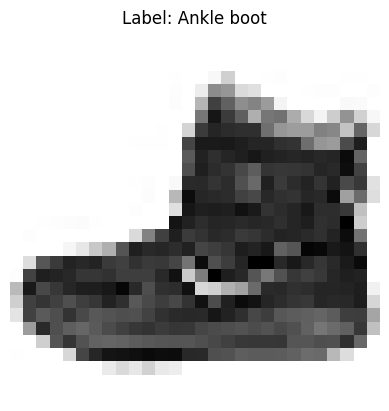

In [3]:
# Define the class names corresponding to labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display one example image
plt.imshow(X_train[0], cmap='Greys')
plt.title(f"Label: {class_names[y_train[0]]}")
plt.axis('off')
plt.show()


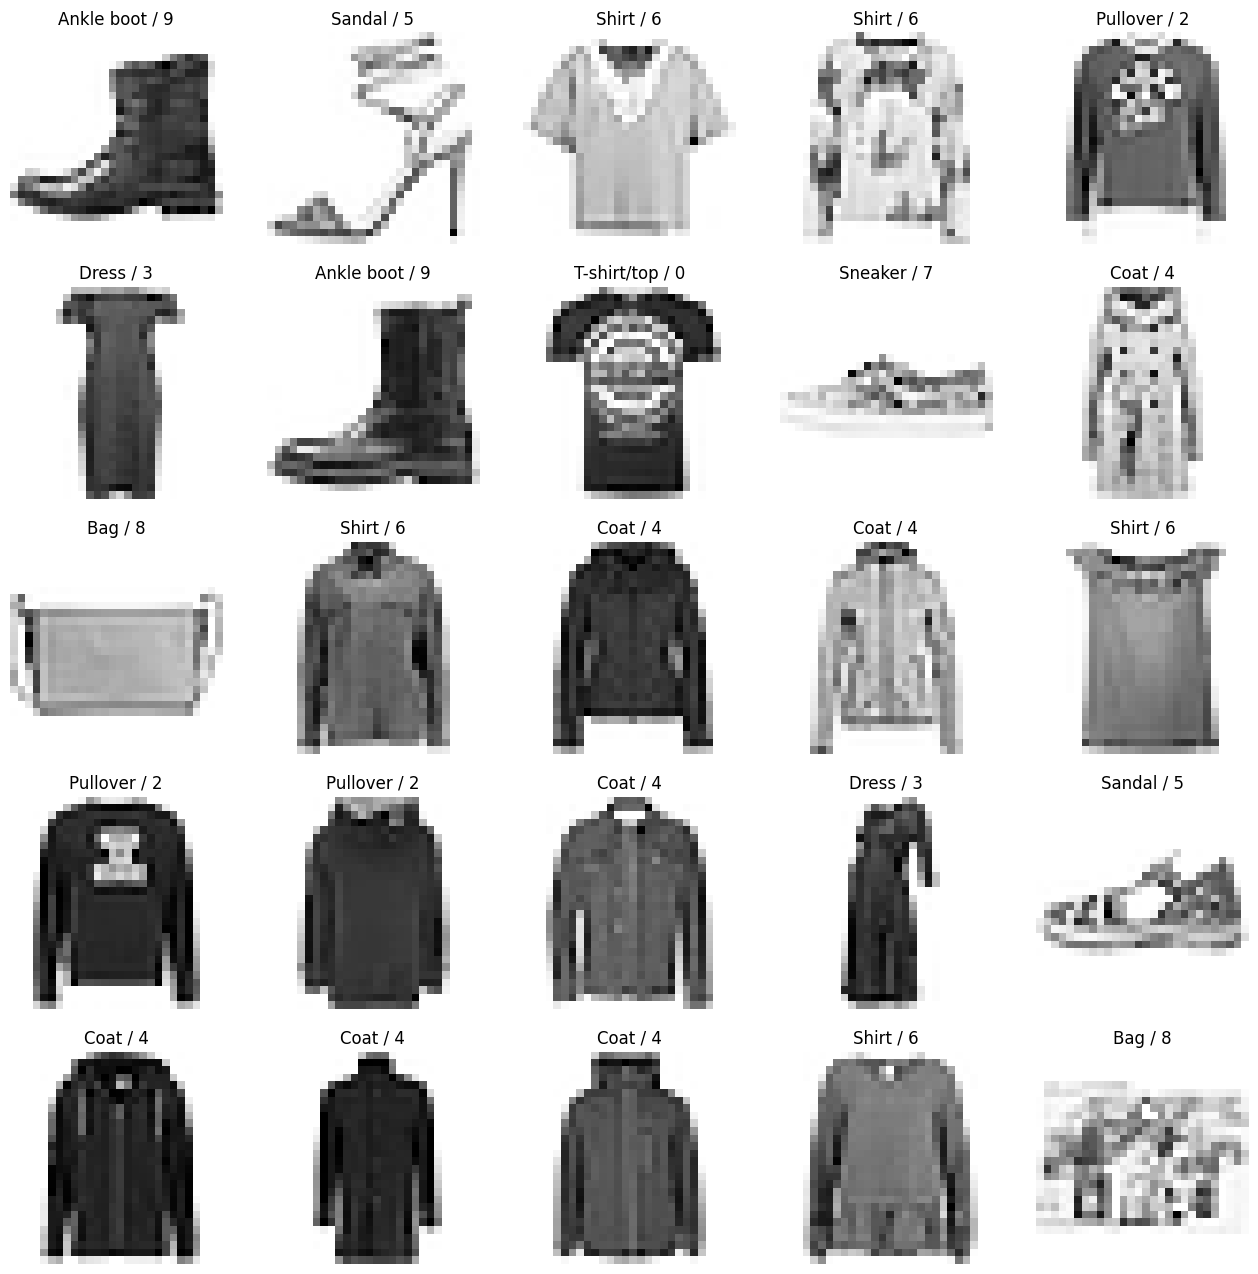

In [4]:
# Display multiple random images from the dataset
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5,5,j)
    j += 1
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
    plt.title(f"{class_names[y_train[i]]} / {y_train[i]}")
plt.show()


In [5]:
# Check the number of dimensions
print("X_train.ndim:", X_train.ndim)

# Expand dimensions to add a channel (for CNN input)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print("After expanding dims, X_train.ndim:", X_train.ndim)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0


X_train.ndim: 3
After expanding dims, X_train.ndim: 4


In [6]:
# Split training data into new training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=2020)

print(f"New Training Data Shape: {X_train.shape}, Validation Data Shape: {X_validation.shape}")


New Training Data Shape: (48000, 28, 28, 1), Validation Data Shape: (12000, 28, 28, 1)


In [7]:
# Build a simple CNN model
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1),
                        padding='valid', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax') # 10 classes
])

# Model summary
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [8]:
# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=512,
                        verbose=1,
                        validation_data=(X_validation, y_validation))


Epoch 1/10
94/94 [==============================] - 6s 15ms/step - loss: 0.6315 - accuracy: 0.7857 - val_loss: 0.4308 - val_accuracy: 0.8503
Epoch 2/10
94/94 [==============================] - 1s 11ms/step - loss: 0.3806 - accuracy: 0.8675 - val_loss: 0.3832 - val_accuracy: 0.8658
Epoch 3/10
94/94 [==============================] - 1s 10ms/step - loss: 0.3315 - accuracy: 0.8848 - val_loss: 0.3352 - val_accuracy: 0.8827
Epoch 4/10
94/94 [==============================] - 1s 14ms/step - loss: 0.3062 - accuracy: 0.8916 - val_loss: 0.3195 - val_accuracy: 0.8878
Epoch 5/10
94/94 [==============================] - 1s 11ms/step - loss: 0.2858 - accuracy: 0.8992 - val_loss: 0.3126 - val_accuracy: 0.8917
Epoch 6/10
94/94 [==============================] - 1s 10ms/step - loss: 0.2620 - accuracy: 0.9079 - val_loss: 0.2866 - val_accuracy: 0.9004
Epoch 7/10
94/94 [==============================] - 1s 10ms/step - loss: 0.2444 - accuracy: 0.9130 - val_loss: 0.2882 - val_accuracy: 0.8977
Epoch 8/10
94

In [9]:
# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 0.2861 - accuracy: 0.8972

Test Accuracy: 0.8972


In [10]:
# Predict classes for the test set
y_pred = cnn_model.predict(X_test)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)


313/313 [==============================] - 1s 2ms/step


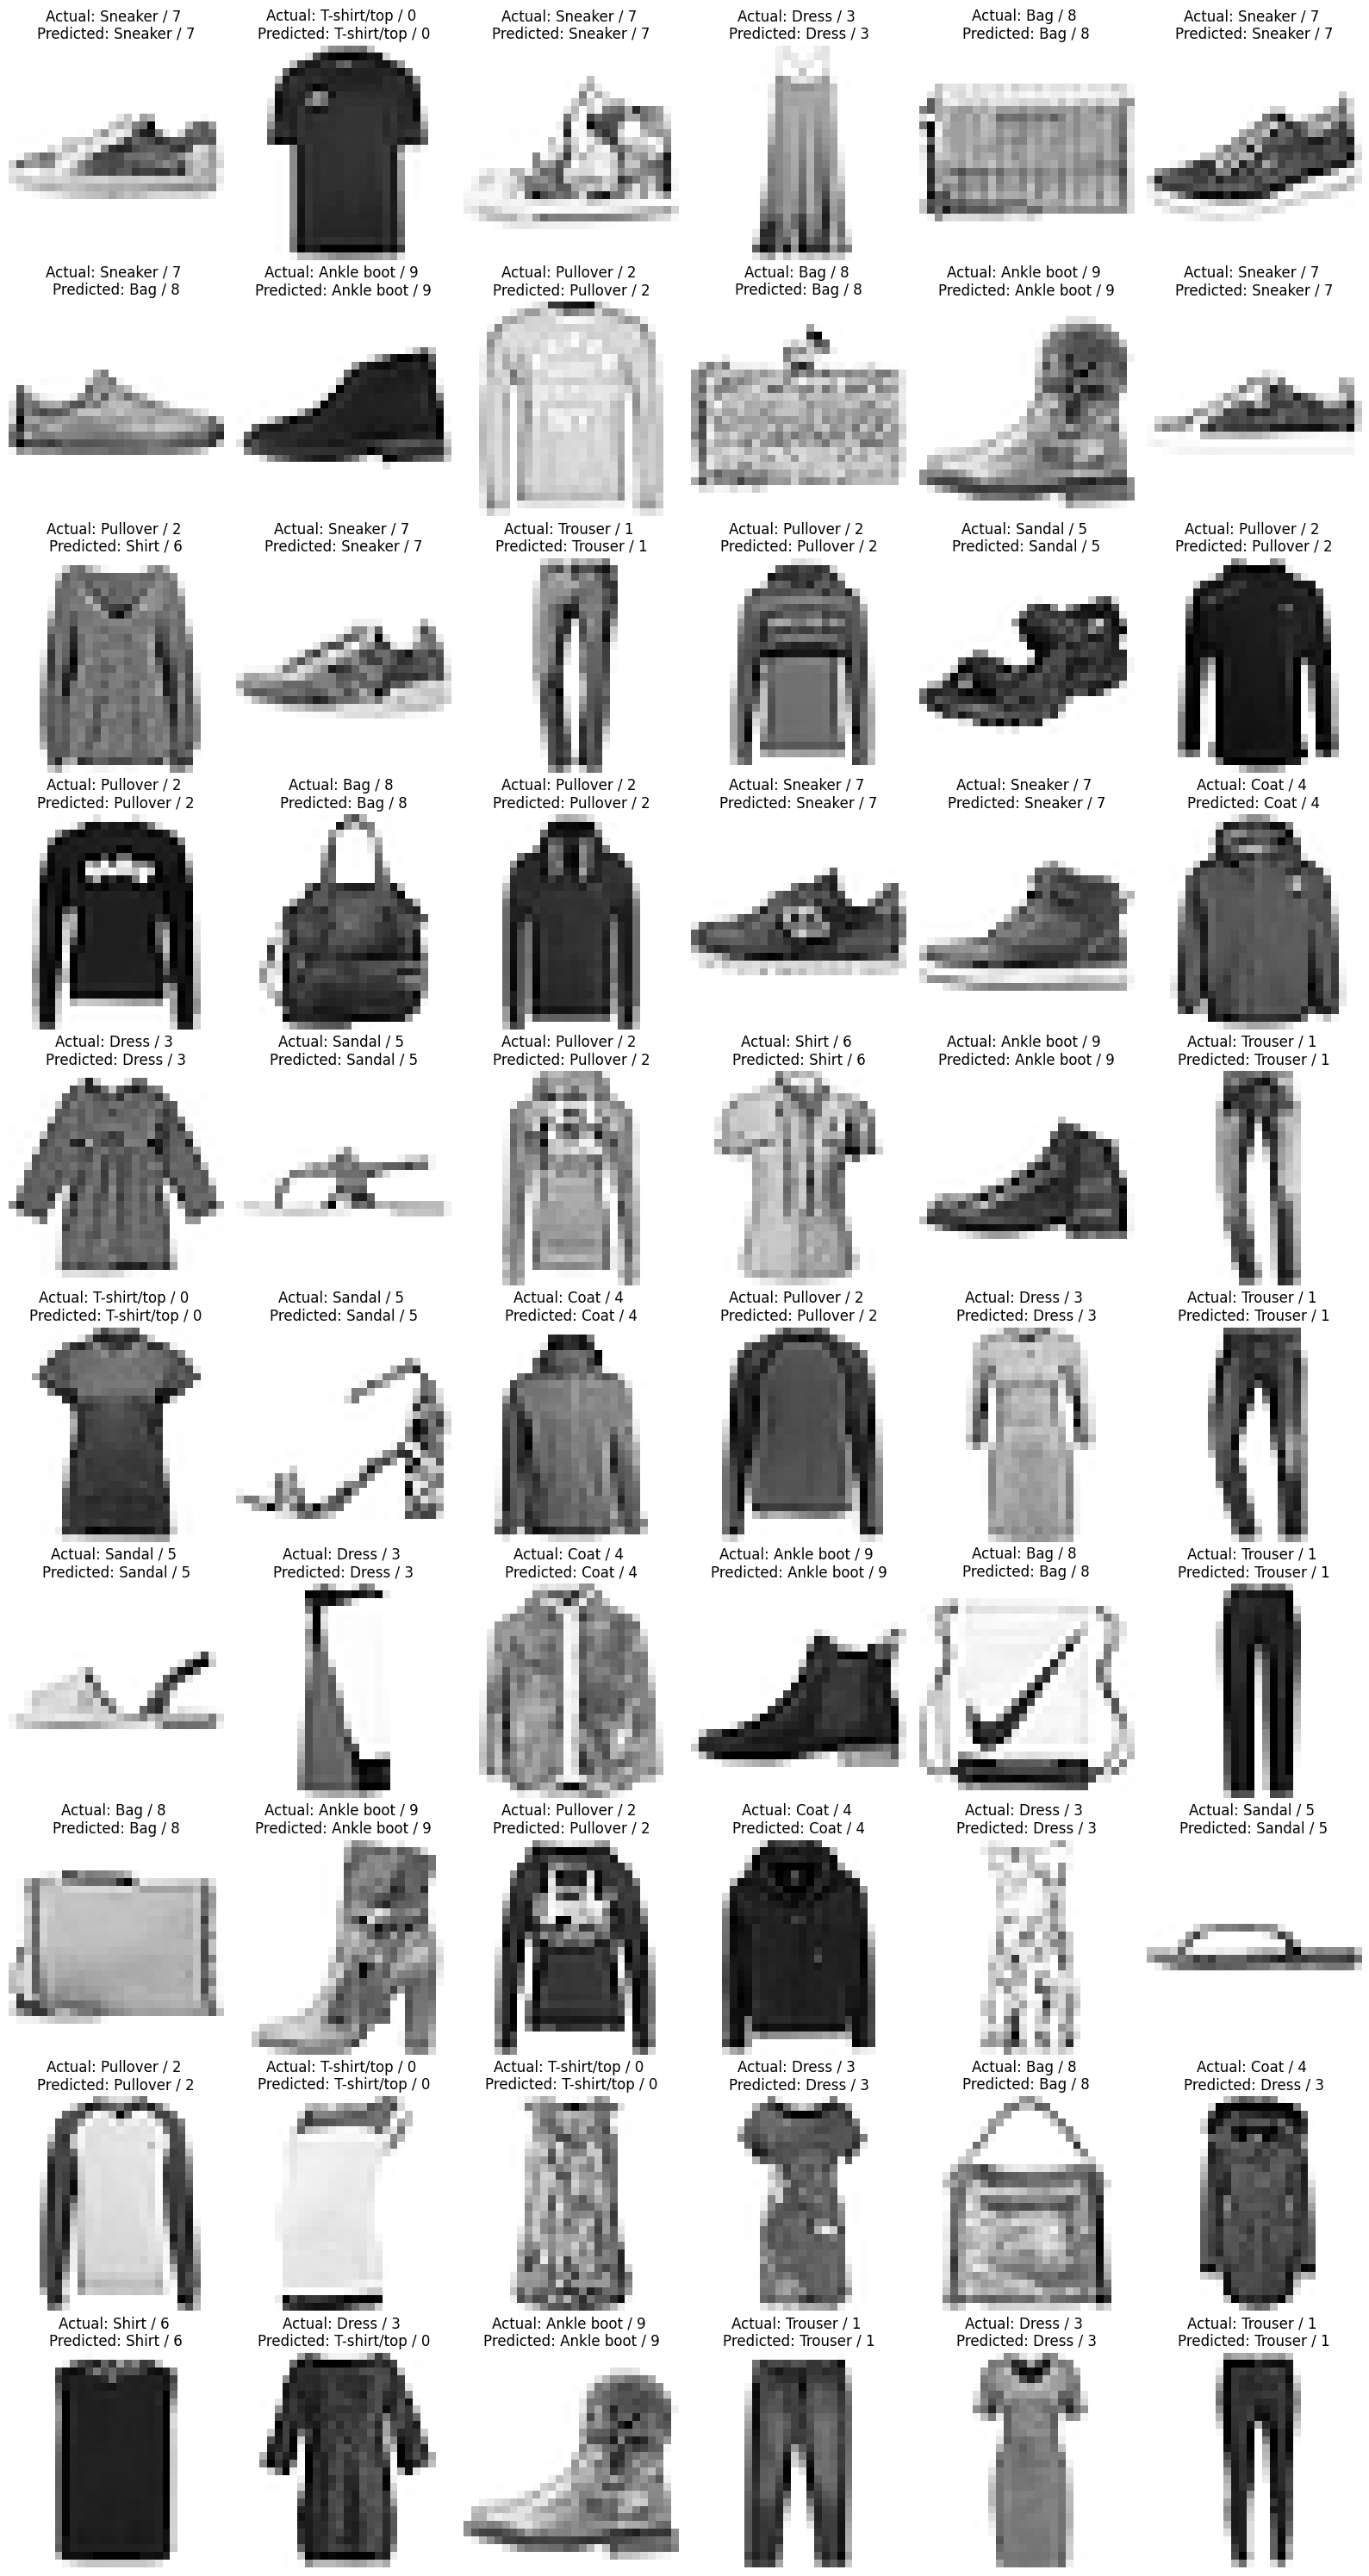

In [11]:
# Visualizing some Predictions
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0, 1000, 60):
    plt.subplot(10,6, j)
    j += 1
    plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
    plt.title(f"Actual: {class_names[y_test[i]]} / {y_test[i]} \nPredicted: {class_names[y_pred_labels[i]]} / {y_pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [12]:
# Generate classification report
cr = classification_report(y_test, y_pred_labels, target_names=class_names)
print(cr)


              precision    recall  f1-score   support

 T-shirt/top       0.81      0.89      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.75      0.92      0.83      1000
       Dress       0.87      0.94      0.90      1000
        Coat       0.87      0.79      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.84      0.60      0.70      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



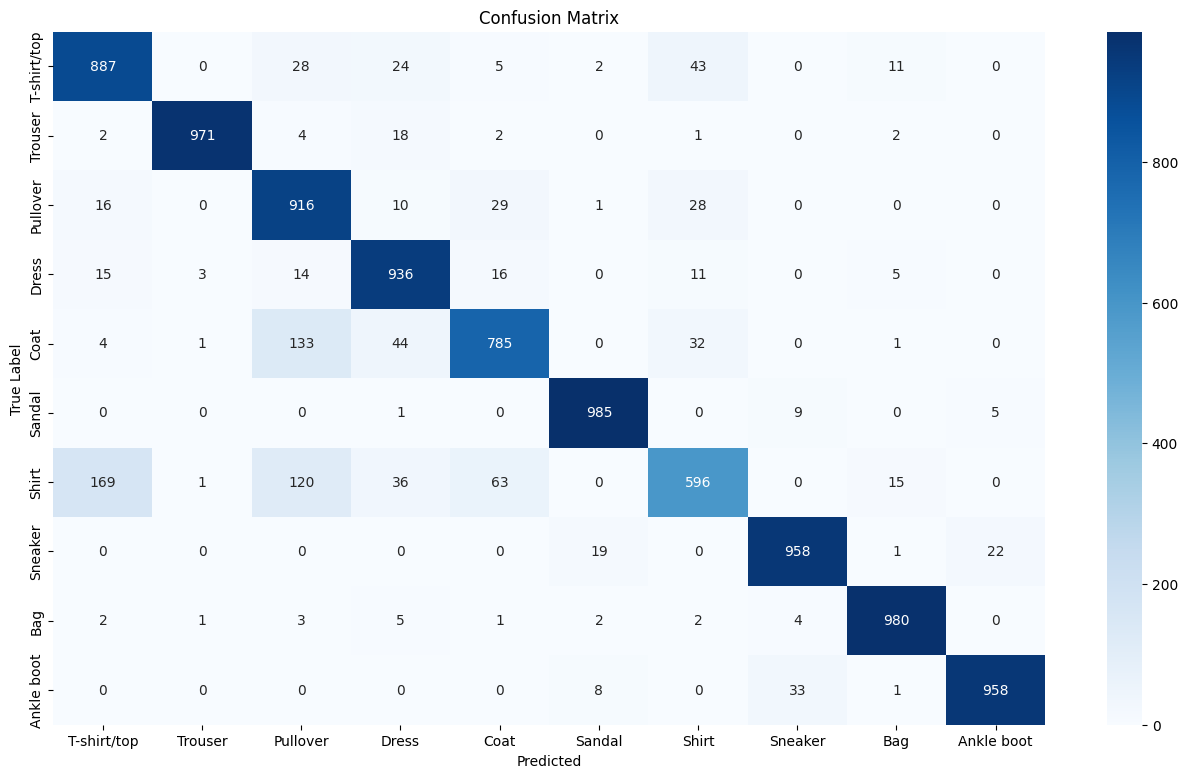

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
